# <div align = "center">COSC 2673/2793 | Machine Learning</div>
<div align = "center"><font size="5">Assignment 2</font></div>
<div align = "center"><font size='4'>by David Aziz (s3825605) and Alistair Chitty (s3902003)</font></div>

# Loading Dataset & Exploratory Data Analysis

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!ls

drive  sample_data


In [3]:
#!cp -r /content/drive/MyDrive/'ML Assignment 2' /content
#%cd /content/'ML Assignment 2'
#!ls

/content/ML Assignment 2
 annotated_imgs.csv		        preprocessedTestData
 archive.zip			        Test
'Creating Independent Test Set.ipynb'   Test.csv
'Machine Learning Assignment 2.ipynb'   trafficsigns_dataset.zip
 preprocessed_annotated_imgs.csv


In [4]:
import zipfile
import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [5]:
# Unzipping Traffic Sign Dataset
filename = "trafficsigns_dataset.zip"
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

#!unzip -q -o /content/'ML Assignment 2'/trafficsigns_dataset.zip

In [6]:
# initializing dicts to store sign-shapes and sign-types
data_dict = {}
data_dict["sign_shapes"] = list()
data_dict["sign_types"] = list()
data_dict["filename"] = list()

# iterate through trafficsigns_dataset folder:
for sign_shape in os.listdir("trafficsigns_dataset/"):
    folder = os.path.join("trafficsigns_dataset/", sign_shape)
    
    # iterate only through sign-shape folders
    if os.path.isdir(folder):
        for sign_type in os.listdir(folder):
            subfolder = os.path.join(folder, sign_type)
            
            # iterate only through sign-type subfolders
            if os.path.isdir(subfolder):
                for image in os.listdir(subfolder):  
                    if image.endswith(".png"):
                        data_dict["sign_shapes"].append(sign_shape)
                        data_dict["sign_types"].append(sign_type)
                        filename = f"trafficsigns_dataset/{sign_shape}/{sign_type}/{image}"
                        data_dict["filename"].append(filename)

In [7]:
signs = pd.DataFrame.from_dict(data_dict)

In [8]:
signs.info() # getting info on the signs dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sign_shapes  3699 non-null   object
 1   sign_types   3699 non-null   object
 2   filename     3699 non-null   object
dtypes: object(3)
memory usage: 86.8+ KB


In [9]:
signs.head(5)

,sign_shapes,sign_types,filename
0,diamond,rightofway,trafficsigns_dataset/diamond/rightofway/00208_...
1,diamond,rightofway,trafficsigns_dataset/diamond/rightofway/00044_...
2,diamond,rightofway,trafficsigns_dataset/diamond/rightofway/00121_...
3,diamond,rightofway,trafficsigns_dataset/diamond/rightofway/01803_...
4,diamond,rightofway,trafficsigns_dataset/diamond/rightofway/00938_...


In the below cells, we create histograms to visualize the frequency of the classes. We observe that there is a class imbalance, and we will need to account for this when we set up the evaluation framework for our developed models.

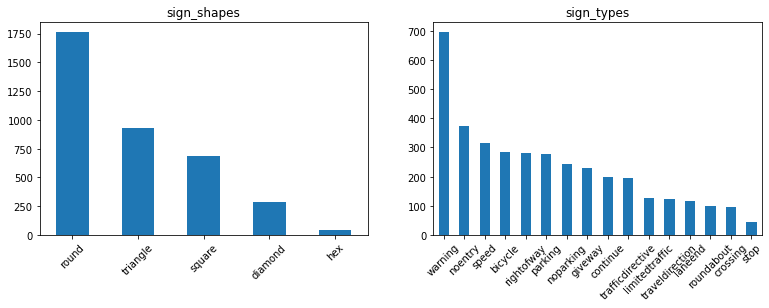

In [10]:
# checking distribution of classes for sign-shapes and sign-types
plt.figure(figsize = (20,18))

for i,col in enumerate(signs.iloc[:,0:2].columns):
    plt.subplot(4,3,i+1)
    signs[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation = 45)

In the below cells, we load in the images from the dataset folder as 1D NumPy arrays. All images are the same size (28x28), so we expect each image array to have 784 features. The images are grayscale, so we only expect 1 channel as well, with the values ranging from 0 to 255.

In [10]:
images = [] # initialize list to store image arrays

for index, row in signs.iterrows():
    filename = row[2]
    img_path = os.path.join(filename)
    img = np.asarray(Image.open(img_path)).flatten()
    images.append(img)
    
images = np.row_stack(images) # convert list of arrays into 2d array

In [11]:
print(f"This dataset has {images.shape[0]} images, and {images.shape[1]} features")

This dataset has 3699 images, and 784 features


The next step in EDA is to randomly sample a few images to visualize the information that we'll later feed into our classifers. To do this, we had to reshape the flattened image arrays into their original dimensions.

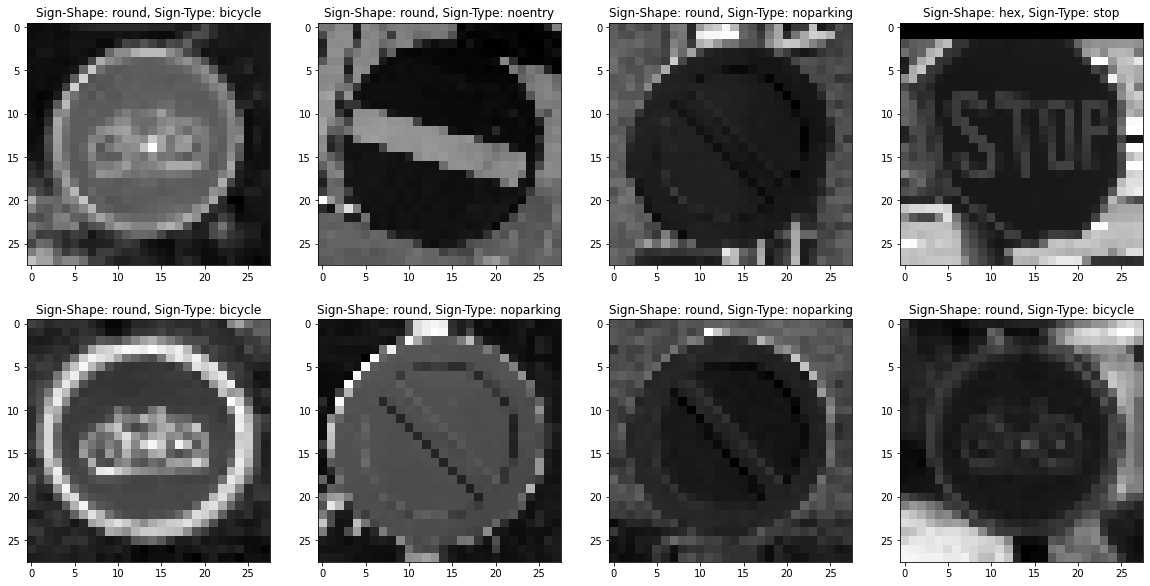

In [13]:
random.seed(0) # using seed to ensure reproducibility of image sample
plt.figure(figsize = (20,10))

num_imgs = 8 # setting size of sample
indices = random.sample(range(images.shape[1]),num_imgs)

for i,j in enumerate(indices):
    plt.subplot(2,4,i+1)
    plt.title(f"Sign-Shape: {signs.iloc[j,0]}, Sign-Type: {signs.iloc[j,1]}")
    plt.imshow(images[j].reshape(28,28), cmap = "gray")

In [14]:
pd.DataFrame(images).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,...,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000
mean,92.232225,92.712625,93.833469,93.676129,93.942687,94.065693,94.178967,94.504190,94.513923,94.978102,...,97.172209,97.173831,96.362530,95.297918,94.896999,94.149500,92.766153,90.021898,87.145174,86.069478
std,70.752777,71.652804,71.596326,71.431897,71.399424,71.235415,71.978231,72.163763,71.872867,71.936054,...,65.988030,66.955995,66.833096,67.025648,66.724743,66.934988,66.159849,65.192246,64.797119,64.946209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,7.000000,1.000000,3.000000,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000
25%,40.000000,40.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,40.000000,41.500000,...,47.000000,46.000000,45.000000,44.000000,44.000000,43.000000,44.000000,42.000000,40.000000,39.000000
50%,71.000000,70.000000,72.000000,72.000000,73.000000,73.000000,71.000000,71.000000,72.000000,72.000000,...,77.000000,76.000000,75.000000,73.000000,73.000000,72.000000,71.000000,69.000000,69.000000,67.000000
75%,127.000000,126.000000,127.000000,128.000000,128.000000,127.000000,128.500000,129.000000,130.000000,130.000000,...,132.000000,132.000000,130.000000,128.000000,128.000000,127.000000,123.000000,119.000000,113.000000,113.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In the above cell, we take the descriptive statistics of the images we loaded in. The min and max values for the pixels are within the range of 0 to 255 inclusive, confirming that we have loaded the data correctly, as well as highlighting the need for data normalization.

# Model Development

## Setting up an Evaluation Framework

Our task is to classify images of European road traffic signs, based on their shape and the type of traffic directives they convey to road users. Therefore, we have two multi-class classification problem tasks, requiring a model for each task. The data collected has shown to have a class imbalance, as seen in EDA. 

In order to evaluate the developed models, we will use a `weighted F1-score`, which can calculate the F1 score for each class in a one-vs-rest manner, then average the scores by using the number of instances in a class to weight each score.

This will allow us to generate an evaluation metric suited for the multiple imbalanced classes.

When evaluating model performance and hyperparameter tuning, we will use `stratified k-fold cross validation`, as it will make use of all the data and in turn, calculate a more general weighted f1-score. We use stratified sampling in our CV to account for the imbalanced classes.

We will perform a train-test split on the data, and we will perform cross validation on the training data. The test data will be used after a tuned model has been cross validated and then subsequently trained on all the available training examples.

## Classifying Sign Types
### Creating a Baseline Model
For a baseline model, we will opt for a `Random Forest Classifier`. This model will be opted for over other traditional supervised learning classifiers because it is non-parametric, meaning there are no assumptions we need to satisfy regarding the underlying data distribution. This in turn can eliminate the need for preprocessing steps such as feature scaling. 

Random Forest was also opted for over another non-parametric model, Decision Tree, due to Random Forest being an ensemble method, which is known to be less prone to overfitting and can achieve more accurate classifications than a single contributing model.

Later on in model development, we will evaluate how a neural network approach compares with our chosen traditional ML algorithm, and make an ultimate judgement based on which one performed better at sign type classification.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [18]:
# preparing data for splitting
images_df = pd.DataFrame(images)
images_df['sign_types'] = signs['sign_types']

# splitting data into training and testing sets
train_data, test_data = train_test_split(images_df, test_size = 0.2, random_state = 0)
train_X = train_data.iloc[:,:-1]
train_y = train_data["sign_types"]

# creating model with default parameters (will tune this later)
sign_type_clf = RandomForestClassifier(random_state=0)

RF_scores_1 = cross_validate(sign_type_clf, train_X, train_y, cv = 5,
                       scoring = 'f1_weighted', return_train_score = True)

In [19]:
print(f"""Training Score: {round(RF_scores_1['train_score'].mean(),3)},
Validation Score: {round(RF_scores_1['test_score'].mean(),3)}""")

Training Score: 1.0,
Validation Score: 0.944


In [20]:
# hyperparameter tuning with gridsearchCV
from sklearn.model_selection import GridSearchCV

params = {}
params['criterion'] = ['gini','entropy']
params['max_features'] = ['sqrt','log2']
params['n_estimators'] = [10, 100, 1000]

grid = GridSearchCV(sign_type_clf, params, cv = 5,
                   scoring = 'f1_weighted', n_jobs = -1)

In [21]:
grid.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             scoring='f1_weighted')

In [22]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=1000, random_state=0)

In [23]:
RF_scores_2 = cross_validate(grid.best_estimator_, train_X, train_y, cv = 5,
                       scoring = 'f1_weighted', return_train_score = True, n_jobs=-1)

In [24]:
print(f"""Training Score: {round(RF_scores_2['train_score'].mean(),3)},
Validation Score: {round(RF_scores_2['test_score'].mean(),3)}""")

Training Score: 1.0,
Validation Score: 0.952


In [26]:
from sklearn.metrics import f1_score

# fitting on all training examples, then predicting on test set
sign_type_fitted_clf = grid.best_estimator_.fit(train_X, train_y)

test_X = test_data.iloc[:,:-1]
test_y = test_data["sign_types"]

y_pred = sign_type_fitted_clf.predict(test_X)
f1_score(test_y, y_pred, average = 'weighted')

0.9666922131262197

### Creating a CNN Classifier
After having created a traditional ML model (Random Forest) and performing hyperparameter tuning, we observed a validation F1-score of 0.961, meaning we have already achieved a high performing model on the given training images. However, the next stage of model development will be to explore Deep Learning, and particularly Convolutional Neural Networks, in order to see if sign-type classification can be improved further. 

As there are many NN architectures around that are capable of performing image classification. For this project, we will opt for a modified version of the VGG architecture proposed by Simonyan and Zisserman in [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556).

VGG16 supports 16 layers, with the input image size being 224x224, however, this is more than what is required for our 28x28 images. What we can observe from the paper is that the convolutional layers in a given VGG block do not reduce the size of the input due to all Conv2D layers having stride 1 and same padding. 

Only the Max Pooling layers reduce the image dimensions by a factor of 2. For example, a 224x224 input becomes 112x112 after Max Pooling with a 2x2 filter. VGG16 uses 5 Max Pooling 2x2 layers to reduce the 224x224 images to 7x7. For our case, we only need 2 Max Pooling layers to reduce 28x28 to 7x7, hence only 2 VGG blocks are needed (6 layers in total). We also need to flatten the features after convolution, then pass the flattened inputs through 2 dense layers.

Originally, VGG16 uses 2 ReLu Activated Dense Layers after convolution, however we will only opt for one Dense layer with ReLu activation to reduce the risk of overfitting, as well as reduce training time.

In the below cells, the modified VGG model is built for the purpose of summarizing the model complexity.

In [13]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
tf.__version__

'2.8.0'

In [29]:
sign_types_output_classes = len(signs['sign_types'].unique())

# Creating this model in order to summarize model complexity, such as number of trainable params
model_VGG_1 = tf.keras.Sequential([
    # VGG Block 1
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    # VGG Block 2
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(sign_types_output_classes, activation = 'softmax')
])

model_VGG_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In order to get a more generalized accuracy metric from training our CNN, we will use 5-fold stratified cross validation. At each epoch, the returned evaluation metrics will be averaged across the five folds, and then the entire history of loss and accuracy will be plotted.

In [14]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data, test_data = train_test_split(signs, test_size = 0.2, random_state = 0)

kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

In [30]:
# Cross Validation on Baseline CNN model (no regularization)
cv_history_VGG_1 = [] # store history objects from training
EPOCHS = 150

X,y = train_data[['filename']], train_data[['sign_types']]

for train, val in kfold.split(X, y):
    train_df = pd.concat([X.iloc[train,],y.iloc[train,]], axis=1).reset_index(drop = True)
    val_df = pd.concat([X.iloc[val,],y.iloc[val,]], axis=1).reset_index(drop = True)

    train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
    val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

    batch_size = 32

    train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_df,
        directory = './',
        x_col = 'filename',
        y_col = 'sign_types',
        target_size = (28,28),
        color_mode = 'grayscale',
        batch_size = batch_size,
        class_mode = 'categorical'
    )

    val_generator = val_datagen.flow_from_dataframe(
        dataframe = val_df,
        directory = './',
        x_col = 'filename',
        y_col = 'sign_types',
        target_size = (28,28),
        color_mode = 'grayscale',
        batch_size = batch_size,
        class_mode = 'categorical'
    )

    model_VGG_1 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(sign_types_output_classes, activation = 'softmax')
    ])

    model_VGG_1.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

    history_VGG_1 = model_VGG_1.fit_generator(train_generator,validation_data = val_generator,epochs = EPOCHS,verbose = 0)
    cv_history_VGG_1.append(history_VGG_1)

Found 2367 validated image filenames belonging to 16 classes.
Found 592 validated image filenames belonging to 16 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Found 2367 validated image filenames belonging to 16 classes.
Found 592 validated image filenames belonging to 16 classes.
Found 2367 validated image filenames belonging to 16 classes.
Found 592 validated image filenames belonging to 16 classes.
Found 2367 validated image filenames belonging to 16 classes.
Found 592 validated image filenames belonging to 16 classes.
Found 2368 validated image filenames belonging to 16 classes.
Found 591 validated image filenames belonging to 16 classes.


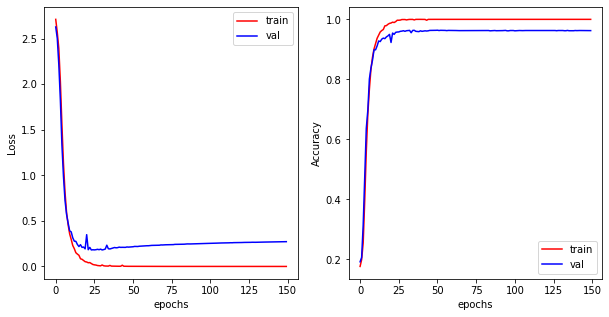

In [31]:
# initializing lists to store various evaluation metrics after averaging across folds
VGG_1_loss, VGG_1_val_loss, VGG_1_acc, VGG_1_val_acc = [], [], [], []

for i in range(EPOCHS):
  temp_loss, temp_val_loss, temp_acc, temp_val_acc = [], [], [], []

  for j in range(len(cv_history_VGG_1)):
    temp_loss.append(cv_history_VGG_1[j].history['loss'][i])
    temp_val_loss.append(cv_history_VGG_1[j].history['val_loss'][i])
    temp_acc.append(cv_history_VGG_1[j].history['categorical_accuracy'][i])
    temp_val_acc.append(cv_history_VGG_1[j].history['val_categorical_accuracy'][i])

  VGG_1_loss.append(sum(temp_loss)/len(temp_loss))
  VGG_1_val_loss.append(sum(temp_val_loss)/len(temp_val_loss))
  VGG_1_acc.append(sum(temp_acc)/len(temp_acc))
  VGG_1_val_acc.append(sum(temp_val_acc)/len(temp_val_acc))

# plotting the learning curves
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(VGG_1_loss, 'red')
plt.plot(VGG_1_val_loss, 'blue')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper right')

plt.subplot(1,2,2)
plt.plot(VGG_1_acc, 'red')
plt.plot(VGG_1_val_acc, 'blue')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='lower right')

plt.show()

In the above learning curve plots, we observe that the neural network is overfitting, and hence we need to handle this.

We will apply regularization techniques, and use stratified, 5-fold grid search for hyperparameter tuning. In particular, we will search for an optimal lambda value for Ridge Regularization, and an optimal dropout rate. 

In order to reduce running time, we will lower the number of epochs to 50 as there appears to be no visible improvement in performance in later epochs. A limited search space will be used to minimize running time.

In [27]:
from sklearn.model_selection import ParameterGrid

params = {}
params["reg_lambda"] = [0.001, 0.01, 0.1]
params["dropout_rate"] = [0.1, 0.2, 0.3]

list(ParameterGrid(params))

[{'dropout_rate': 0.1, 'reg_lambda': 0.001},
 {'dropout_rate': 0.1, 'reg_lambda': 0.01},
 {'dropout_rate': 0.1, 'reg_lambda': 0.1},
 {'dropout_rate': 0.2, 'reg_lambda': 0.001},
 {'dropout_rate': 0.2, 'reg_lambda': 0.01},
 {'dropout_rate': 0.2, 'reg_lambda': 0.1},
 {'dropout_rate': 0.3, 'reg_lambda': 0.001},
 {'dropout_rate': 0.3, 'reg_lambda': 0.01},
 {'dropout_rate': 0.3, 'reg_lambda': 0.1}]

In [ ]:
# Performing a custom GridSearchCV for regularization hyperparameters on CNN
best_params = None
best_val_acc = 0
EPOCHS = 50

X,y = train_data[['filename']], train_data[['sign_types']]

for parameters in list(ParameterGrid(params)):
    reg_lambda = parameters["reg_lambda"]
    dropout_rate = parameters["dropout_rate"]
    cv_history_VGG_2 = [] # store history objects from training

    for train, val in kfold.split(X, y):
        train_df = pd.concat([X.iloc[train,],y.iloc[train,]], axis=1).reset_index(drop = True)
        val_df = pd.concat([X.iloc[val,],y.iloc[val,]], axis=1).reset_index(drop = True)

        train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
        val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

        batch_size = 32

        train_generator = train_datagen.flow_from_dataframe(
            dataframe = train_df,
            directory = './',
            x_col = 'filename',
            y_col = 'sign_types',
            target_size = (28,28),
            color_mode = 'grayscale',
            batch_size = batch_size,
            class_mode = 'categorical'
        )

        val_generator = val_datagen.flow_from_dataframe(
            dataframe = val_df,
            directory = './',
            x_col = 'filename',
            y_col = 'sign_types',
            target_size = (28,28),
            color_mode = 'grayscale',
            batch_size = batch_size,
            class_mode = 'categorical'
        )

        model_VGG_2 = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same',
                                  kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(28,28,1)),
            tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same',
                                  kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
            tf.keras.layers.MaxPooling2D((2,2)),

            tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same',
                                  kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
            tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same',
                                  kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
            tf.keras.layers.MaxPooling2D((2,2)),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation = 'relu'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(sign_types_output_classes, activation = 'softmax')
        ])

        model_VGG_2.compile(optimizer='SGD',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=['categorical_accuracy'])

        history_VGG_2 = model_VGG_2.fit_generator(train_generator,validation_data = val_generator,epochs = EPOCHS,verbose = 0)
        cv_history_VGG_2.append(history_VGG_2)

    VGG_2_val_acc = []
    for i in range(EPOCHS):
        temp_val_acc = []
        for j in range(len(cv_history_VGG_2)):
            temp_val_acc.append(cv_history_VGG_2[j].history["val_categorical_accuracy"][i])
        VGG_2_val_acc.append(sum(temp_val_acc)/len(temp_val_acc))
    if VGG_2_val_acc[-1] > best_val_acc:
        best_val_acc = VGG_2_val_acc[-1]
        best_params = parameters

In [ ]:
best_params

{'dropout_rate': 0.3, 'reg_lambda': 0.001}

In [ ]:
# Running Cross Validation on tuned CNN model
cv_history_VGG_3 = [] # store history objects from training
EPOCHS = 50

X,y = train_data[['filename']], train_data[['sign_types']]

for train, val in kfold.split(X, y):
    train_df = pd.concat([X.iloc[train,],y.iloc[train,]], axis=1).reset_index(drop = True)
    val_df = pd.concat([X.iloc[val,],y.iloc[val,]], axis=1).reset_index(drop = True)

    train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
    val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

    batch_size = 32

    train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_df,
        directory = './',
        x_col = 'filename',
        y_col = 'sign_types',
        target_size = (28,28),
        color_mode = 'grayscale',
        batch_size = batch_size,
        class_mode = 'categorical'
    )

    val_generator = val_datagen.flow_from_dataframe(
        dataframe = val_df,
        directory = './',
        x_col = 'filename',
        y_col = 'sign_types',
        target_size = (28,28),
        color_mode = 'grayscale',
        batch_size = batch_size,
        class_mode = 'categorical'
    )

    model_VGG_3 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', 
                               kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same',
                               kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same',
                               kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same',
                               kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(sign_types_output_classes, activation = 'softmax')
    ])

    model_VGG_3.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

    history_VGG_3 = model_VGG_3.fit_generator(train_generator,validation_data = val_generator,epochs = EPOCHS,verbose = 0)
    cv_history_VGG_3.append(history_VGG_3)

Found 2959 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Found 2959 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.
Found 2959 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.
Found 2959 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.
Found 2960 validated image filenames belonging to 16 classes.
Found 739 validated image filenames belonging to 16 classes.


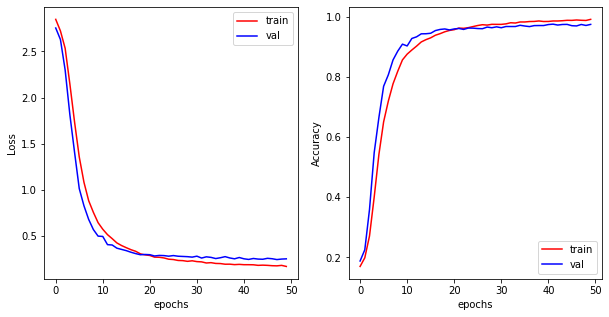

In [ ]:
# initializing lists to store various evaluation metrics after averaging across folds
VGG_3_loss, VGG_3_val_loss, VGG_3_acc, VGG_3_val_acc = [], [], [], []

for i in range(EPOCHS):
  temp_loss, temp_val_loss, temp_acc, temp_val_acc = [], [], [], []

  for j in range(len(cv_history_VGG_3)):
    temp_loss.append(cv_history_VGG_3[j].history['loss'][i])
    temp_val_loss.append(cv_history_VGG_3[j].history['val_loss'][i])
    temp_acc.append(cv_history_VGG_3[j].history['categorical_accuracy'][i])
    temp_val_acc.append(cv_history_VGG_3[j].history['val_categorical_accuracy'][i])

  VGG_3_loss.append(sum(temp_loss)/len(temp_loss))
  VGG_3_val_loss.append(sum(temp_val_loss)/len(temp_val_loss))
  VGG_3_acc.append(sum(temp_acc)/len(temp_acc))
  VGG_3_val_acc.append(sum(temp_val_acc)/len(temp_val_acc))

# plotting the learning curves
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(VGG_3_loss, 'red')
plt.plot(VGG_3_val_loss, 'blue')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper right')

plt.subplot(1,2,2)
plt.plot(VGG_3_acc, 'red')
plt.plot(VGG_3_val_acc, 'blue')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='lower right')

plt.show()

After regularizing with the tuned hyperparameters, we were able to address the overfitting issue in our modified VGG neural network. In 50 epochs, the model was able to achieve 97.4% validation accuracy, and a training accuracy of 99.1%. This difference of ~1.7% is far better than the ~3.5% difference in our unregularized neural network.

However, since we used F1-score for the Random Forest classifier earlier, we will take the regularized CNN model, train it, then predict with it on the partitioned `test_data` from earlier. This will allow us to use the sklearn F1-score, which isn't included in Keras because it is a global metric, and does not apply well to batch learning.

In [ ]:
VGG_3_val_acc[-1], VGG_3_acc[-1]

(0.9745869278907776, 0.9913489103317261)

In [ ]:
VGG_1_val_acc[-1], VGG_1_acc[-1]

(0.9659371733665466, 1.0)

In [ ]:
# Training CNN Model with Tuned Hyperparameters, to be used on independent test data
EPOCHS = 50
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_data,
    directory = './',
    x_col = 'filename',
    y_col = 'sign_types',
    target_size = (28,28),
    color_mode = 'grayscale',
    batch_size = batch_size,
    class_mode = 'categorical'
)

model_VGG_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', 
                            kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same',
                            kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same',
                            kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same',
                            kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(sign_types_output_classes, activation = 'softmax')
])

model_VGG_3.compile(optimizer='SGD',
          loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
          metrics=['categorical_accuracy'])

history_VGG_3 = model_VGG_3.fit_generator(train_generator, epochs = EPOCHS,verbose = 0)

model_VGG_3.save("model_VGG_3")